# İntro to data structures

In [3]:
import numpy as np
import pandas as pd

## Series

In [5]:
# From ndarray
s = pd.Series(np.random.randn(5), index=["a","b","c","d","e"])
print(s)
print(s.index)

a    0.654457
b    1.800125
c   -0.329065
d    1.619839
e   -0.734587
dtype: float64
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [ ]:
# From dictionary
d = {"b" : 1, "a" : 0, "c" : 5}
s = pd.Series(d)
print(s)
#If an index is passed, the values in data corresponding 
#to the labels in the index will be pulled out
s = pd.Series(d, index=["a","d","c","b"])
print(s) #NaN(not o number is the standart missing data marker in pandas)

b    1
a    0
c    5
dtype: int64
a    0.0
d    NaN
c    5.0
b    1.0
dtype: float64


In [10]:
# From scalar value
s = pd.Series(5.0, index=["a","b","c","d"])
print(s)

a    5.0
b    5.0
c    5.0
d    5.0
dtype: float64


## Series is ndarray-like

In [25]:
s = pd.Series(np.arange(4), index=["a","b","c","d"])
print(s)
#print(s[2]) this doesnt work
print(s.iloc[:3])
print(s[s > s.median()])
print(s.iloc[[3,1,2]])

a    0
b    1
c    2
d    3
dtype: int64
a    0
b    1
c    2
dtype: int64
c    2
d    3
dtype: int64
d    3
b    1
c    2
dtype: int64


In [26]:
# Like a numpy array, a pandas series has a single data type
print(s.dtype)
# if u need actual ndarray u can simply:
c = s.to_numpy()
print(c)
print(type(c))

int64
[0 1 2 3]
<class 'numpy.ndarray'>


## Series is dict-like

In [35]:
s = pd.Series(np.arange(4), index=["a","b","c","d"])
print(s["a"])
s["d"] = -9
print(s)
print("e" in s)
print("c" in s)
#s["x"] this will cause an exception
print(s.get("x")) #this returns nothing
print(s.get("x",np.nan)) # this returns nan
# Labels can also be accessed by attribute
print(s.a)

0
a    0
b    1
c    2
d   -9
dtype: int64
False
True
None
nan
0


## Vectorized operations and label alignment with Series

In [38]:
s = pd.Series(np.arange(4), index=["a","b","c","d"])
print(s+s)
print(s*20)
print(np.exp(s)) # Series can also be passed into most numpy methods
# expecting an ndarray

a    0
b    2
c    4
d    6
dtype: int64
a     0
b    20
c    40
d    60
dtype: int64
a     1.000000
b     2.718282
c     7.389056
d    20.085537
dtype: float64


In [51]:
s = pd.Series(np.arange(4), index=["a","b","c","d"])
d = pd.Series(np.arange(12,16), index=["a","b","c","f"])
print(s)
print(d)
print(s*d) # Since the labels f and d are not shared, the values
# of for f and d were set to NaN in the result
print(s+d)
# if u dont want the Nan values, u can use dropna function
x = s*d
print(x.dropna())


a    0
b    1
c    2
d    3
dtype: int64
a    12
b    13
c    14
f    15
dtype: int64
a     0.0
b    13.0
c    28.0
d     NaN
f     NaN
dtype: float64
a    12.0
b    14.0
c    16.0
d     NaN
f     NaN
dtype: float64
a     0.0
b    13.0
c    28.0
dtype: float64


## Name attribute

In [55]:
s = pd.Series(np.arange(5), name="something")
print(s)
print(s.name)
s = s.rename("changed") # u can assign to s2 (diffrent object)
print(s.name)

0    0
1    1
2    2
3    3
4    4
Name: something, dtype: int64
something
changed


# Data Frame

In [67]:
#From dict of Series or dicts
d = {
    "one":pd.Series([1.0,2.0,3.0],index=["a","b","c"]),
    "two":pd.Series([1.0,2.0,3.0,4.0],index=["a","b","c","d"]),
}
df = pd.DataFrame(d)
print(df)
df2 = pd.DataFrame(d, index=["c","d","a","x"])
print(df2)
df3 = pd.DataFrame(d, index=["d","a","b","c","x"], columns=["two","three","one","four"])
print(df3)
print("-----------------------")
print(df3.index)
print(df3.columns)

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0
   one  two
c  3.0  3.0
d  NaN  4.0
a  1.0  1.0
x  NaN  NaN
   two three  one four
d  4.0   NaN  NaN  NaN
a  1.0   NaN  1.0  NaN
b  2.0   NaN  2.0  NaN
c  3.0   NaN  3.0  NaN
x  NaN   NaN  NaN  NaN
-----------------------
Index(['d', 'a', 'b', 'c', 'x'], dtype='object')
Index(['two', 'three', 'one', 'four'], dtype='object')


In [73]:
#From dict of ndarrays / lists
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
d2 = pd.DataFrame(d) # If index is not passed then indexes will be range(n)
# where the n is array length example:
print(d2) 
d3 = pd.DataFrame(d, index=["a","b","c","d"])
print(d3)

   one  two
0  1.0  4.0
1  2.0  3.0
2  3.0  2.0
3  4.0  1.0
   one  two
a  1.0  4.0
b  2.0  3.0
c  3.0  2.0
d  4.0  1.0


In [74]:
#From structured or record array

Since i dont know structured numpy arrays a little study will be good
# Numpy's Structured Array
source = https://www.geeksforgeeks.org/numpy-structured-array/

In [91]:
dt = np.dtype([('name', (np.str_),10), ('age', np.int32), ('weight', np.float64)])
a = np.array([('Yavuz', 21, 67.4), ('Veli', 56, 70.0)], dtype=dt)
print(a)
print(a.dtype)

#min and max
max_age = np.max(a['age'])
min_age = np.min(a['age'])

print("Max age = ",max_age) 
print("Min age = ",min_age)

#concatenating structured array
b = np.array([('Mehmet', 34, 87)], dtype=dt)
c = np.concatenate((a,b))
print(c)

#Reshaping a structured array
reshaped_c = np.reshape(c, (3,1))
print(reshaped_c)

[('Yavuz', 21, 67.4) ('Veli', 56, 70. )]
[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]
Max age =  56
Min age =  21
[('Yavuz', 21, 67.4) ('Veli', 56, 70. ) ('Mehmet', 34, 87. )]
[[('Yavuz', 21, 67.4)]
 [('Veli', 56, 70. )]
 [('Mehmet', 34, 87. )]]


In [26]:
#From structured or record array
import numpy as np
import pandas as pd
data = np.zeros((2,), dtype=[("a", "i4"), ("b", "f4"), ("c", "S10")])
data[:] = [(1,2.0,"Hello"), (2, 3.0, "World")]
print(pd.DataFrame(data))
print(pd.DataFrame(data, index=["first","second"]))
print(pd.DataFrame(data, columns=["b","c","a"]))

   a    b         c
0  1  2.0  b'Hello'
1  2  3.0  b'World'
        a    b         c
first   1  2.0  b'Hello'
second  2  3.0  b'World'
     b         c  a
0  2.0  b'Hello'  1
1  3.0  b'World'  2


In [29]:
#From a list of dicts
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
print(pd.DataFrame(data2))
print(pd.DataFrame(data2, index=["first","second"]))
print(pd.DataFrame(data2, columns=["c","a"]))

   a   b     c
0  1   2   NaN
1  5  10  20.0
        a   b     c
first   1   2   NaN
second  5  10  20.0
      c  a
0   NaN  1
1  20.0  5


In [30]:
#From a dict of tuples
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

In [2]:
#From a Series
import pandas as pd
import numpy as np
ser = pd.Series(range(3), index=list("abc"), name="ser")
print(ser)
print(pd.DataFrame(ser))

a    0
b    1
c    2
Name: ser, dtype: int64
   ser
a    0
b    1
c    2


## Column selection, addition, deletion

In [3]:
d = {
    "one":pd.Series([1.0,2.0,3.0],index=["a","b","c"]),
    "two":pd.Series([1.0,2.0,3.0,4.0],index=["a","b","c","d"]),
}
df = pd.DataFrame(d)
print(df)
df["three"] = df["one"] * df["two"]
df["flag"] = df["one"] > 2
df 

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0


,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [4]:
del df["two"]

three = df.pop("three")

print(df)
print(three)

   one   flag
a  1.0  False
b  2.0  False
c  3.0   True
d  NaN  False
a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64


In [5]:
# insert a scalar value
df["foo"] = "bar"
print(df)

   one   flag  foo
a  1.0  False  bar
b  2.0  False  bar
c  3.0   True  bar
d  NaN  False  bar


In [6]:
# when we insert a series does not have same index as the DF :
df["blabla"] = df["one"][:3]
df

,one,flag,foo,blabla
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,3.0
d,NaN,False,bar,NaN


In [ ]:
df.insert(3,"bar3",df["one"]) # didnt understand first parameter
df

,bar2,one,flag,bar3,bar,foo,blabla
a,1.0,1.0,False,1.0,1.0,bar,1.0
b,2.0,2.0,False,2.0,2.0,bar,2.0
c,3.0,3.0,True,3.0,3.0,bar,3.0
d,NaN,NaN,False,NaN,NaN,bar,NaN


## Assigning new columns in method chains

In [14]:

data = {
    "SepalLength": [5.1, 4.9, 4.7, 4.6, 5.0],
    "SepalWidth": [3.5, 3.0, 3.2, 3.1, 3.6],
    "PetalLength": [1.4, 1.4, 1.3, 1.5, 1.4],
    "PetalWidth": [0.2, 0.2, 0.2, 0.2, 0.2],
    "Name": ["Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa"]
}
iris = pd.DataFrame(data)


<Axes: xlabel='SepalRatio', ylabel='PetalRatio'>

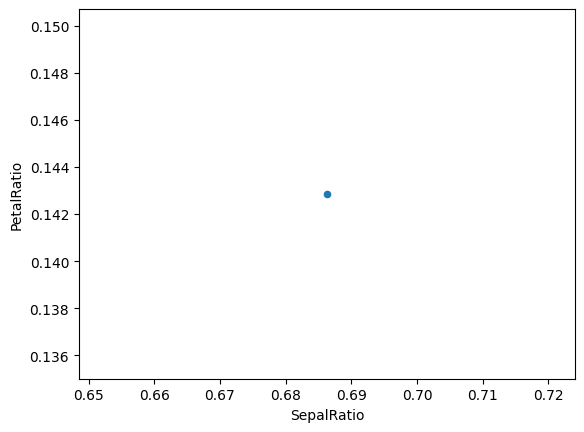

In [22]:
import matplotlib.pyplot as plt
iris.query("SepalLength > 5").assign(
        SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
        PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
    ).plot(kind="scatter", x="SepalRatio", y="PetalRatio") #Since we dont have the dataset we got just 1 dot :D

# Indexing / Selection

In [24]:
df

,bar2,one,flag,bar3,bar,foo,blabla
a,1.0,1.0,False,1.0,1.0,bar,1.0
b,2.0,2.0,False,2.0,2.0,bar,2.0
c,3.0,3.0,True,3.0,3.0,bar,3.0
d,NaN,NaN,False,NaN,NaN,bar,NaN


In [25]:
df["blabla"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: blabla, dtype: float64

In [26]:
df.loc["a"]

bar2        1.0
one         1.0
flag      False
bar3        1.0
bar         1.0
foo         bar
blabla      1.0
Name: a, dtype: object

In [27]:
df.iloc[2]

bar2       3.0
one        3.0
flag      True
bar3       3.0
bar        3.0
foo        bar
blabla     3.0
Name: c, dtype: object

In [30]:
df[2:4]

,bar2,one,flag,bar3,bar,foo,blabla
c,3.0,3.0,True,3.0,3.0,bar,3.0
d,NaN,NaN,False,NaN,NaN,bar,NaN


In [31]:
df = pd.DataFrame(np.random.randn(10,4), columns=["A","B","C","D"])
df2 = pd.DataFrame(np.random.randn(7,3), columns=["A","B","C"])
df + df2

,A,B,C,D
0,3.530589,0.267742,0.357388,NaN
1,-0.382315,2.491088,-0.567875,NaN
2,-0.080691,-0.217170,-0.874397,NaN
3,0.339507,0.268287,0.895604,NaN
4,0.401001,-0.026274,-2.990593,NaN
5,0.039913,-0.049767,0.199933,NaN
6,0.439335,-0.133768,2.832844,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [33]:
df - df.iloc[4]

,A,B,C,D
0,2.578822,-1.913508,1.450417,-1.516736
1,-0.351937,0.360313,1.403832,-1.478518
2,-0.262625,-1.092849,0.278960,-2.168484
3,-0.283522,-1.626198,2.166315,-1.189039
4,0.000000,0.000000,0.000000,0.000000
5,0.122206,-0.928523,-0.382470,-0.238768
6,0.594621,-1.539972,3.465912,-1.354262
7,-0.026546,0.650186,1.509645,0.030492
8,-0.574131,-1.116221,1.959933,1.092513
9,-1.284525,-0.569870,-0.073412,-2.490138


In [36]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)
print(df1)
print(df2)
df1 & df2

       a      b
0   True  False
1  False   True
2   True   True
       a      b
0  False   True
1   True   True
2   True  False


,a,b
0,False,False
1,False,True
2,True,False


In [39]:
print(df1)
print(df1.T)

       a      b
0   True  False
1  False   True
2   True   True
       0      1     2
a   True  False  True
b  False   True  True


# DatFrame interoperability with Numpy Funcitons

In [40]:
np.exp(df)

,A,B,C,D
0,10.809987,0.361702,1.534360,0.413393
1,0.576784,3.514464,1.464521,0.429498
2,0.630667,0.821785,0.475521,0.215433
3,0.617625,0.482090,3.139335,0.573694
4,0.820082,2.451190,0.359765,1.883967
5,0.926681,0.968555,0.245423,1.483808
6,1.486270,0.525504,11.514516,0.486323
7,0.798598,4.696229,1.627982,1.942297
8,0.461865,0.802802,2.553919,5.617533
9,0.226984,1.386391,0.334300,0.156178


In [ ]:
print(np.asarray(df) == np.asanyarray(df)) # ??

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [46]:
ser = pd.Series([1,2,3,4])
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

In [47]:
ser1 = pd.Series([12, 24, 32], index=["a", "b", "c"])
ser2 = pd.Series([2, 2, 7], index=["b", "c", "a"])
np.remainder(ser1,ser2)

a    5
b    0
c    0
dtype: int64

In [ ]:
ser3 = pd.Series([2,4,6], index=["b","c","d"])
print(ser3)
np.remainder(ser1,ser3) # gaps will fill with NaN

b    2
c    4
d    6
dtype: int64


a    NaN
b    0.0
c    0.0
d    NaN
dtype: float64

In [58]:
idx = pd.Index([4321321,5,6])
ser = pd.Series([131,2312,321])

print(f"type:{type(np.maximum(ser,idx))} \nitself:\n{np.maximum(ser,idx)}")


type:<class 'pandas.core.series.Series'> 
itself:
0    4321321
1       2312
2        321
dtype: int64


In [ ]:
#Console display 
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [67]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [68]:
print(iris.iloc[4:32].to_string())

    sepal_length  sepal_width  petal_length  petal_width species
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8          4.0           1.2          0.2  setosa
15           5.7          4.4           1.5          0.4  setosa
16           5.4          3.9           1.3          0.4  setosa
17           5.1          3.5           1.4          0.3  setosa
18           5.7         

In [70]:
print(pd.DataFrame(np.random.randn(3,12)))

         0         1         2         3         4         5         6   \
0 -0.994945  1.176917 -0.118758  0.380128  0.609729 -0.626519  0.561183   
1 -0.205153  0.545179 -0.530867  1.598555 -1.293791 -0.081072  1.756631   
2  0.636249 -1.411837 -0.606975 -0.139917  1.284833  0.142279  2.368465   

         7         8         9         10        11  
0 -2.349733 -1.810546  0.973729  0.397250 -0.160075  
1 -1.263696 -0.410623 -1.700357 -0.987835 -1.176607  
2  0.071554  0.405361 -0.137307 -0.639948  0.910939  


### DataFrame column attribute access and IPython completion

In [71]:
df = pd.DataFrame({"foo1": np.random.randn(5), "foo2": np.random.randn(5)})
df

,foo1,foo2
0,-0.071639,-0.712700
1,-1.110390,-0.753386
2,-0.319871,-0.173091
3,-0.650673,-0.222061
4,2.534489,1.152545


In [72]:
df.foo1

0   -0.071639
1   -1.110390
2   -0.319871
3   -0.650673
4    2.534489
Name: foo1, dtype: float64